# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The smartcab stays idle and does not move in the simulation. Moreover, when I ran the simulation, it does not update its status and thus the simulation seems to have very little effect on its disposition. 
Below is a summary of the kinds of rewards that driving agent receives during this simulation:
+ When the smartcab stays idle at a red light, it gets a positive reward point. 
+ When the smartcab stays idle at a green light with no oncoming traffic, it gets a negative reward point. 
The above description of the reward points that driving agent received alternate continously between red light and green light many times while running the simulation. 

Overall, the smartcab stays at the same position and does not move at all during this simulation. When the light is red, the smartcab's driving agent receives a negative point and when the light turns green, he/she receives a positive point. 

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

1.In the agent.py Python file, I chose the following three flags that can be set and changed to influence the results of the simulation:

+ **learning**: originally learning was set to FALSE, meaning the agent was not expected to learn by default during the simulation. By changing this flag to true, the agent will be expected to use Q-learning to learn throughout the simulation. This flag seems to be affected by the values of the epsilon and alpha parameters, which are the exploration factor and the learning rate respectively. These parameters also have their own default values that could be changed to influence the learning behavior of the agent.
+ **grid-size**: this flag is set to is a 6 rows by 8 columns environment for the agent to be in. This flag can also be changed to obtain more states for the environment. 
+ **enforce_deadline**: this flag is set to TRUE if the agent is evaluated on a deadline goal, meaning whether the agent is on-time. Currently, this flag is set to FALSE, which means the agent is not expected to follow any deadline.

2.In the environemnt.py file, the 'acct()' class function is called when an agent performs an action.

3.In the simulator.py file, even though both 'render_text' and 'render' functions perform the same task, which is displaying the current state of the simulation at each step, the 'render_text' function is the non-GUI render display while the 'render' function is the GUI render display. In other words, the render_text function only displays the current state in a textual format whereas the render function displays the current state in a nice graphical user interface (GUI) using the Python PyGame module. 

4.In the planner.py file, the 'next_waypoint()' function will be considered the East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


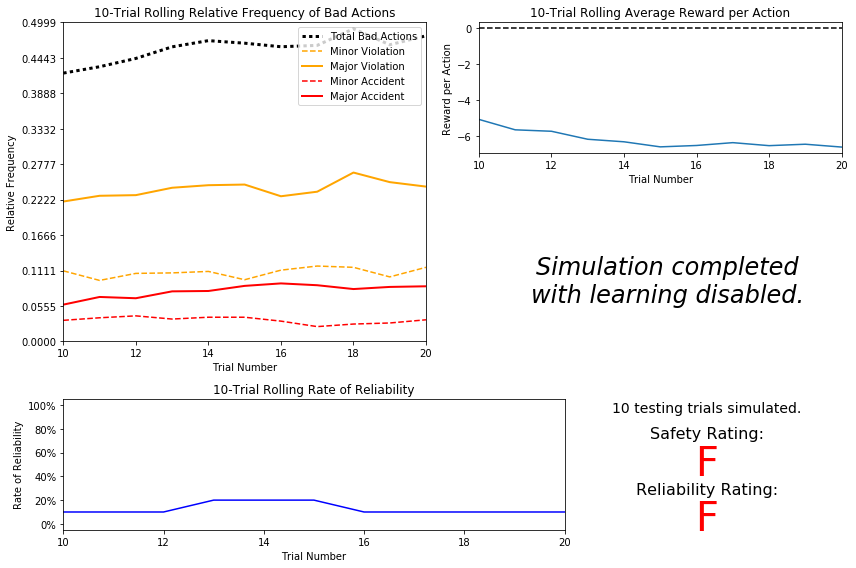

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

According to the visualization above, here is a few observations that can be concluded:

1. The relative frequency of the total bad actions seems to increase throughout 20 trials. Particularly, at the very beginning, it is around 40% for the overall including ~22% major violations, ~5.5% major accidents, ~4% minor accidents and ~11% minor violations. At the very end (20 trials), the total number of bad violations has gone up to ~47% with the composition of each type of accident seem to also increase. 
2. Given that the agent is driving randomly, the rate of reliablity does make sense in this senario since the agent is not really learning anything or is expected to learn. And because of this, the agent seems to be late almost 90% most of the time. 
3. The rewards that the agent is getting seems to gradually decrease fro, -5 to -7 though they did fluctuate a bit during the initial simulation. This behavior makes sense since the total number of bad violations increase during the simulation; and thus resulting in decreasing in the average reward per action. With that in mind, it indicates that there is penalty in the actions that the agent made; however the rewards seem to not be penalized heavily (i.e rewards drop significantly from one trial to the next one). 
4. As the number of trials increases, the rolling rate of reliablility does not change overall and stays a constant around 10%. The total bad actions seem to gradually increase over time, which leads to the increment in each violation type. Thus, both safety and reliability did not recieve any improvement overtime and should receive an F grade. 
5. According to the aforementioned analysis, this smartcab would not be considered safe or reliable for its passengers since the agent is driving randomly and not expected to learn. The reliability rate is also very low with 10% on-time. 

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

I would consider the following features to be relevant for learning both **safety** and **efficiency**:

1. **waypoint**: this is because the agent should know where the smartcab is heading in order to figure out the correct destination and thus improve the efficiency. Moreover, by identifying the correct direction, safety will also be improved. 
2. **light**: the agent should be able to identify the color of the light in order to drive safely (i.e. know when to stop and when to keep moving). In addition, to improve its efficiency, the smartcab should also learn that it cannot idle at green light and need to stop by red light. 
3. **left**: this parameter is to indicate that there is traffic coming/present on the left and its intended action is left. Thus, if there is a vehical present on the left and the input (the light) is red, the cab cannot go forward and can only do none or right. If there is no traffic on the right, then a right turn would be allowed based on US. law and vice versa. If there is a vehicle present on the left and light is red, then taking a left action will result in a major accident. If the light is green and there is also a vehicle on the left with the intent to go forward, making a left turn would also create a major accident. Overall, knowing this feature is required to improve both efficiency and safety for the smartcab's customers. 
4. **oncoming**: the agent should be aware of the intended direction of travel for a vehicle across the interaction from it since that will help it avoid major accidents when it tries to make a left turn at a green light. 

I would not consider the following features to be relevant for learning both **safety** and **efficiency**:

1. **right**: this parameter is to indicate that there is traffic coming/present on the right and the its intended action is right. Thus, if there is a vehical present on the right and the input (the light) is red, the cab cannot go forward and can only do none or right. Two of these actions are not affected by the presence of the vehicle on the right of the smartcab. Overall, knowing this feature is not required to improve both efficiency and safty for the smartcab's customers. 
2. **deadline**: I don't think knowing the number of actions remaining for the smartcab to reach the destination before running out of time will have any effect in its efficiency and safety. 

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

+ **waypoint**:
    + number of states: 3 (left, right, forward)
+ **inputs: light**:
    + number of states: 2 (red, green)
+ **inputs: right**:
    + number of states: 4 (left, right, forward, none)
+ **inputs: left**:
    + number of states: 4 (left, right, forward, none)

Therefore, it should be 3x2x4x4=96 number of states for 4 features. However, there are 4 different possible actions that the agent can take (left, right, forward, none). So if we count that in, there would be 384 possible combinations. Either case, the number is not too large and totally doable for the driving agent to learn a policy for each possible state within a reasonable number of trials. 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

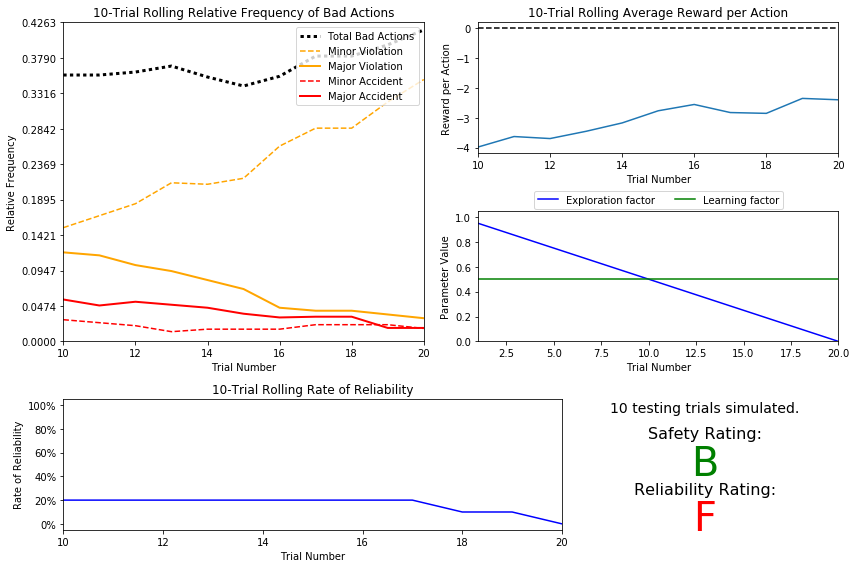

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

+ According to the visualization generated above, it appears that both the basic driving agent and the default Q-Learning agent are not reliable in term of time. Their reliability rate still needs further improvement. The total bad violations between the two agents are pretty much the same though there are differences in term of each type of violation. For example, while the number of major violations and major accidents has gone down dramatically with the default agent, the amount of minor violations and accidents has gone up quite of it for her/him. In addition, the reliability rate for the default agent is also worse than the basic driving agent (0% versus 10%)
+ Approximately, it take about 20 training trails before the Q-learning driving agent is required for testing. The epsilone tolerance is 0.05, and the decremence is 0.05 which means 1 - 20*0.05 = 0.0 < 0.05. Thus, it makes sense that it requires 20 trials for this scenario. 
+ As the number of training trials increased, the number of bad actions gradually increases and then gradually decreases a bit. However, the average reward per action increases as the n-trial increases. 
+ In comparison between the Q-learning driving agent and the basic driving agent, the safety rating is improved for the Q-Learning agent (from F to B) while the reliability rating stays the same for both agents. 

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

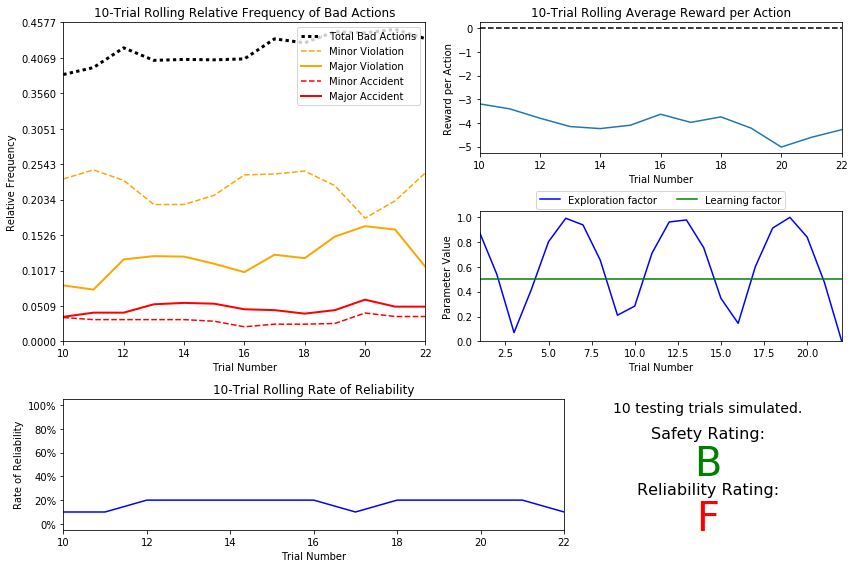

epsilon = abs(cos(at)), alpha = 0.5, tolerance = 0.05, n_test=10


In [17]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print ("epsilon = abs(cos(at)), alpha = 0.5, tolerance = 0.05, n_test=10")

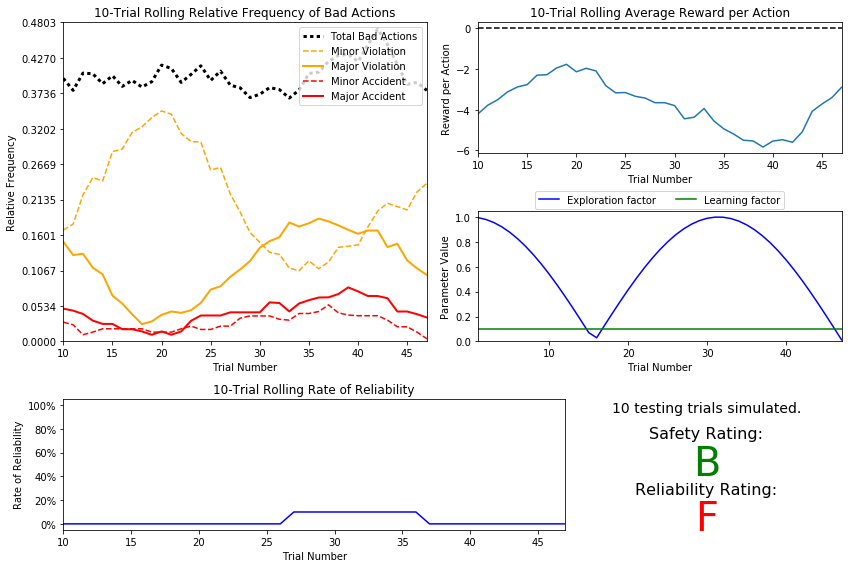

epsilon = abs(cos(at)), alpha = 0.1, tolerance = 0.05, n_test=10


In [18]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print ("epsilon = abs(cos(at)), alpha = 0.1, tolerance = 0.05, n_test=10")

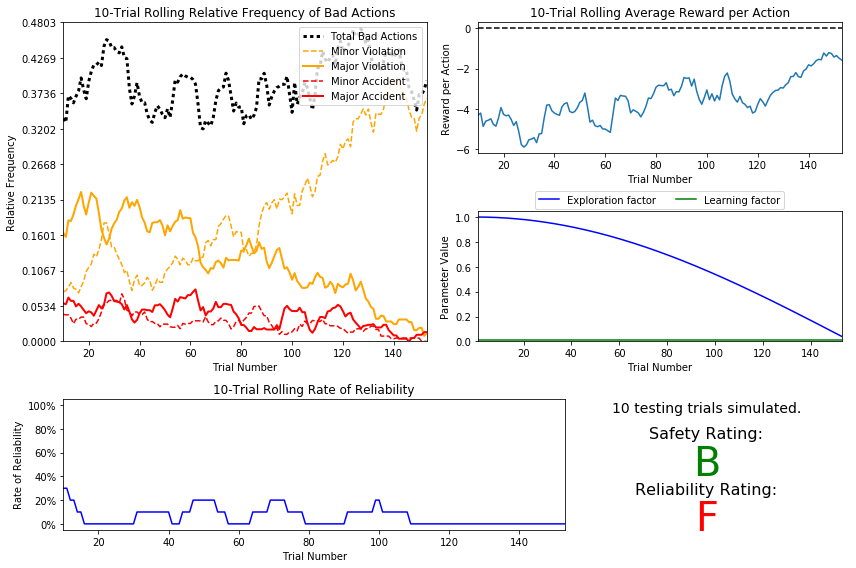

epsilon = abs(cos(at)), alpha = 0.01, tolerance = 0.05, n_test=10


In [21]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print ("epsilon = abs(cos(at)), alpha = 0.01, tolerance = 0.05, n_test=10")

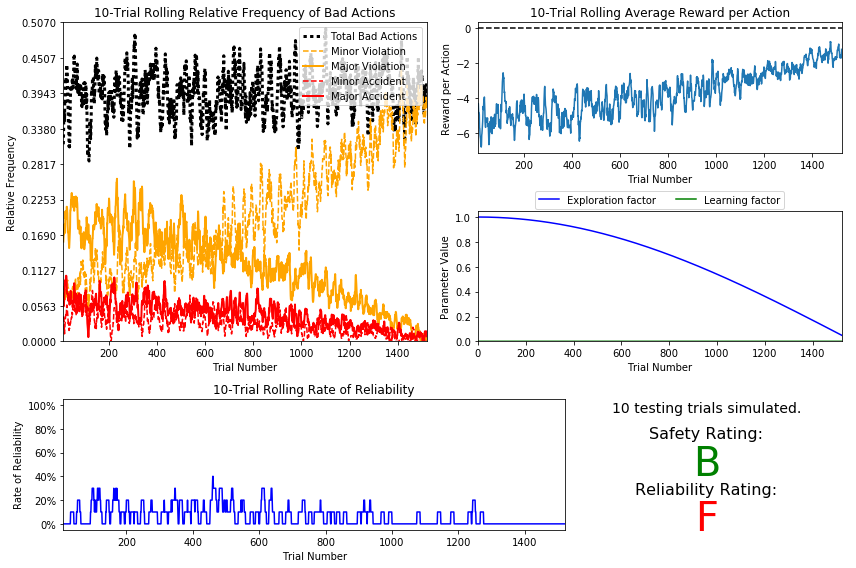

epsilon = abs(cos(at)), alpha = 0.001, tolerance = 0.05, n_test=10


In [20]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print ("epsilon = abs(cos(at)), alpha = 0.001, tolerance = 0.05, n_test=10")

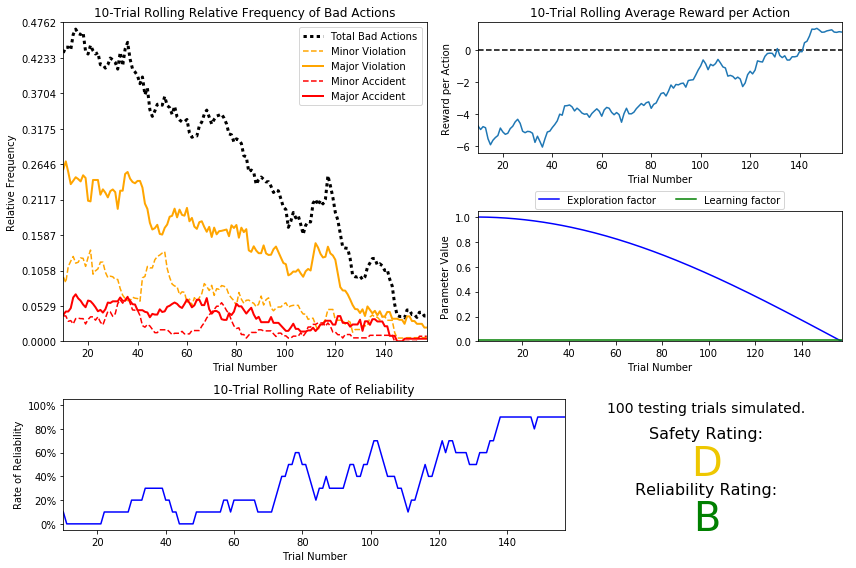

epsilon = abs(cos(at)), alpha = 0.01, tolerance = 0.001, n_test=100


In [22]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print ("epsilon = abs(cos(at)), alpha = 0.01, tolerance = 0.001, n_test=100")

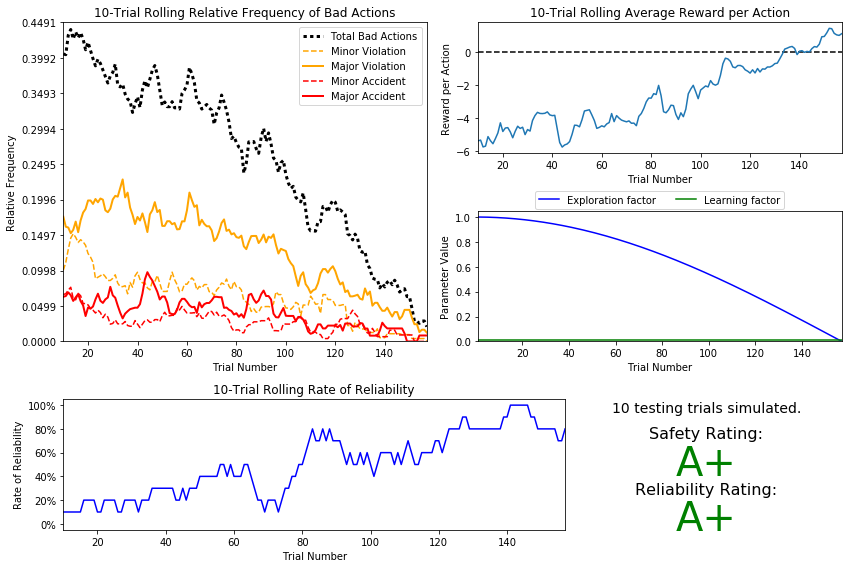

epsilon = abs(cos(at)), alpha = 0.01, tolerance = 0.001, n_test=10


In [23]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print ("epsilon = abs(cos(at)), alpha = 0.01, tolerance = 0.001, n_test=10")

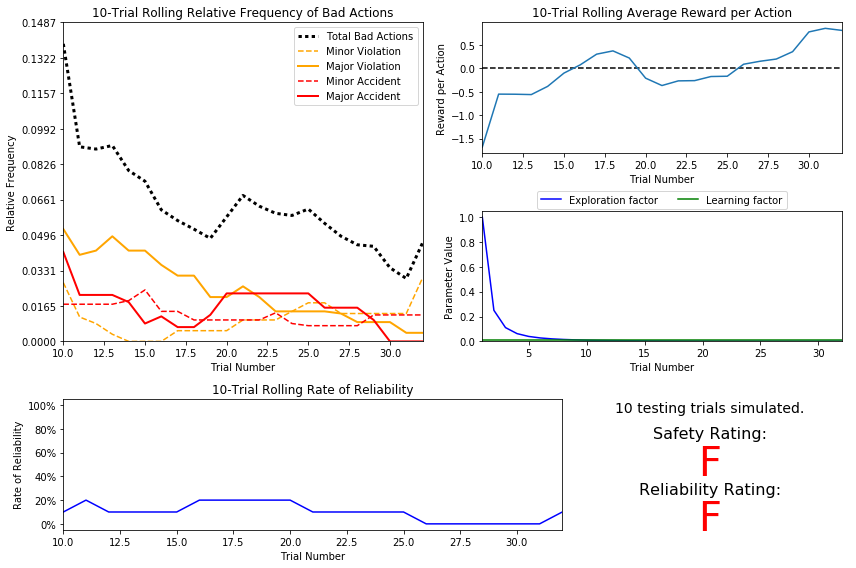

epsilon = 1.0/(t**2), alpha = 0.01, tolerance = 0.001, n_test=10


In [24]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print ("epsilon = 1.0/(t**2), alpha = 0.01, tolerance = 0.001, n_test=10")

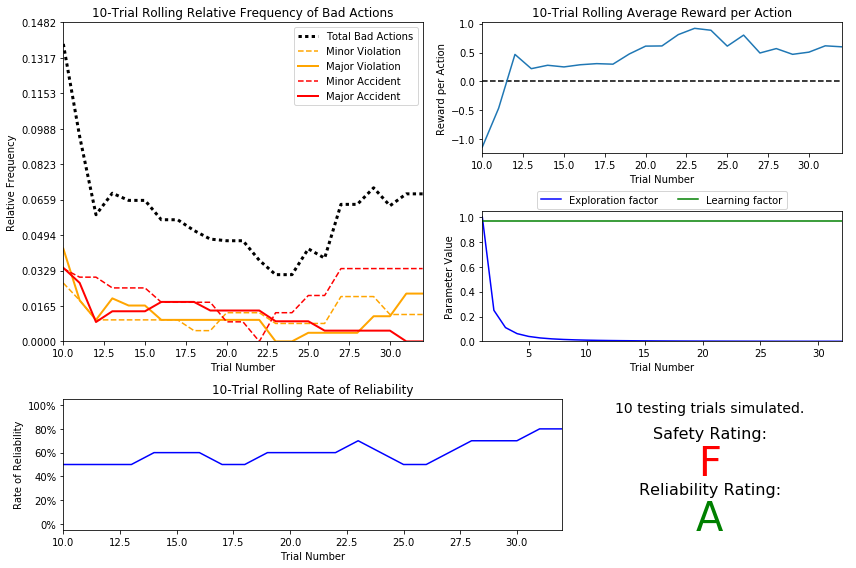

epsilon = 1.0/(t**2), alpha = 0.97, tolerance = 0.001, n_test=10


In [25]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print ("epsilon = 1.0/(t**2), alpha = 0.97, tolerance = 0.001, n_test=10")

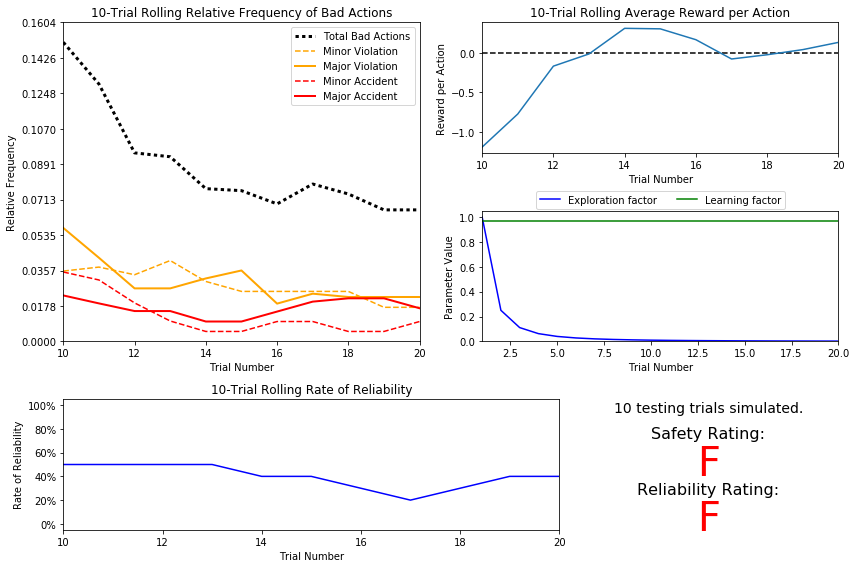

epsilon = 1.0/(t**2), alpha = 0.01, tolerance = 0.01, n_test=10


In [26]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print ("epsilon = 1.0/(t**2), alpha = 0.01, tolerance = 0.01, n_test=10")

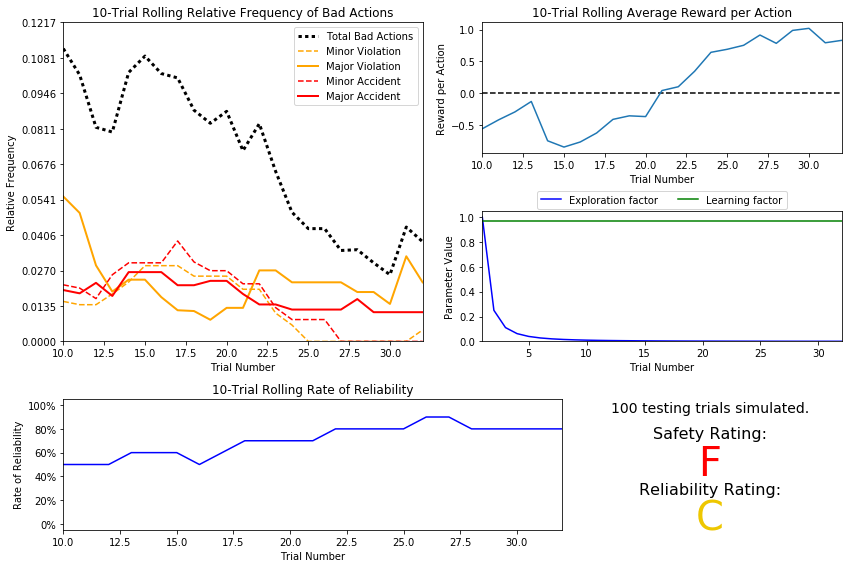

epsilon = 1.0/(t**2), alpha = 0.97, tolerance = 0.001, n_test=100


In [27]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print ("epsilon = 1.0/(t**2), alpha = 0.97, tolerance = 0.001, n_test=100")

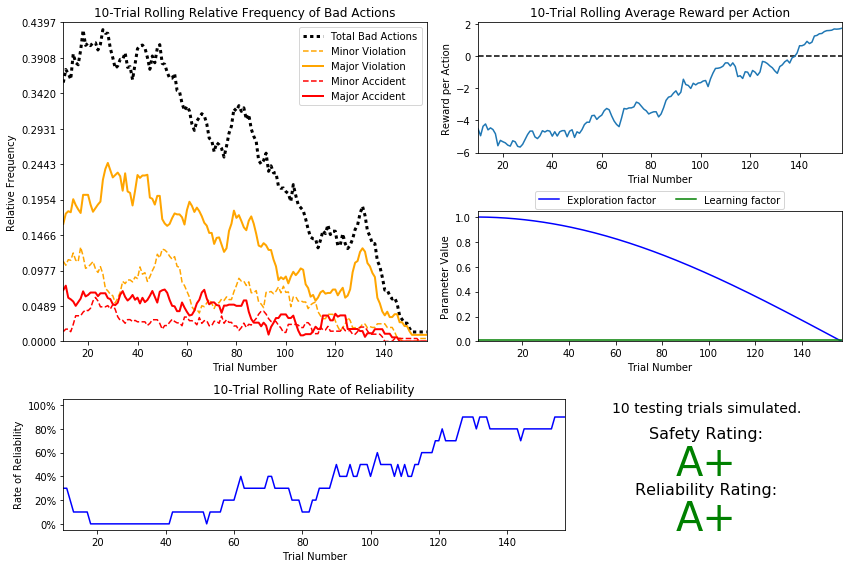

FINAL epsilon = abs(cos(at)), alpha = 0.01, tolerance = 0.001, n_test=10


In [33]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print ("FINAL epsilon = abs(cos(at)), alpha = 0.01, tolerance = 0.001, n_test=10")

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

|Trial  	|Epsilon  	|Alpha   	|Tolerance   	|Safety   	|Reliability   	|n-test   	|  
|:---:	|:---:	|:---:	|:---:	|:---:	|:---:	|:---:	|:---:	|:---:	|:---:	|:---:  |
|  1 	|   abs(cos(at))	|  0.5 	| 0.05  	|  B 	|   F	| 10  	|  	
|   2	|   abs(cos(at))	|  0.1 	|  0.05 	|   B	|   F	| 10  	|   	
|   3	|   abs(cos(at))	|  0.01 	|  0.05| B  	|   F	|   10	|  
|   4	|   abs(cos(at))	|  0.001 	|  0.05 	|  B 	|  F 	|   10	|   	
|   5	|   abs(cos(at))	|  0.01 	| 0.001|  D 	|   B	|     100  |   	
|   **6**	|   **abs(cos(at))**	| **0.01**  	|  **0.001** 	| **A+ ** 	| ** A+ **	|  ** 10**	| 
|   7	|   1.0/(t**2)	|  0.01 	|  0.001 	|   F	|   F	|   10	|   	
|   8	|   1.0/(t**2)	|   0.97	|  0.001 	|   F	|  A 	|   10    |   	
|   9	|   1.0/(t**2)	|   0.01	| 0.01  	|   F	| F  	|   10	|   
|   9	|   1.0/(t**2)	|  0.97	|   0.001	|   	F| C  	|   10	| 

1. I made 10 trials, in which I chose trial 6 to be the final result since it gave the best rating in both reliability and safety for the driving agent. The final optimized result has: 
    + epsilon = abs(cost(at)
    + alpha = 0.1 
    + tolerance = 0.001
    + safety = A+
    + reliability = A+
    + n-test = 10 
2. Approximately, it took about 157 training trails before beginning testing. This number makes sense since epsilon = abs(cos(0.01*157)) = 0.000796 < 0.001, which is the tolerance 
3. I used alpha = 0.1 and the tolerance = 0.001. These numbers were changed from small to large to see which pair would give the best result based on the epsilon function that I chose. 
4. In comparison to the default Q-Learn agent from the previous section, the new optimized Q-Learn agent has a dramatic improvement in both reliability and safety ratings.The total number of bad accidents has gone down dramatically to ~3% in comparison to the previous one. Moreover, average reward per action has also gone up to a positive value, which indicate a huge improvement from the default Q-Learn agent. 
5. I would say that the Q-Learner results does show the driving agent has successfully learned an appropriately policy based on both the safety and reliabity rating. Moreover, based on the obtained graphs, we can see that the number of bad actions does go down as the number of trials increases. The on-time percentage (reliability) also gradually goes up.
6. I am satisfied with the Smartcab agent's A+ ratings for safety and A rating for reliability.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

An optimal policy for this problem is the following pair: state (forward, red, none, none) and the action is none. 
After looking through my sim_improved-learning.txt, I found this policyfor this same state:

    forward_red_None_None
    -- forward : -3.38
    -- left : -3.55
    -- right : 0.20
    -- None : 1.29
 
 The action with the highest value of 1.29 is **None**, which is matched with an optimal policy for this case. 
 
 There are also other policies that follow a suboptimal state such as {forward, red, none, none}. For example:
  
    forward_red_right_right
    -- forward : 0.00
    -- left : 0.00
    -- right : 0.03
    -- None : 0.00

which has the highest value for the **right** action, meaning the driving agent turn right when the light is red. This action is correct based on US laws; however, it could be unsafe due to the present oncoming traffic coming from the left side of the driver. 
 
 Another example of the suboptimal policy is: 
 
    right_green_forward_None
    -- forward : 0.09
    -- left : 0.07
    -- right : 0.31
    -- None : -0.39

which has the highest value for the **right** action. The agent chose to turn right instead of going forward when the light is green in this case. This is absolutely a correct action to take since the waypoint is right. 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

+ Although the deadline metric is given, the driving agent still does not know where the final destination is and it only knows what the next waypoint is to reach. This make it inefficient for the agent to learn a good route to reach the destination and thus taking future rewards would not benefit.
+ In this simulation, the destination goals are randomly selected for each training and testing trial. Because of this, a route that was followed previously might not be applied in the future or could be applied but the reward cannot help us to evaluate whether the route is good or bad choice. Thus, calculating a future reward will require updating the calculation of the Q-value at time to fix this problem. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.